# New Section

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



In [2]:
# read customer file and check the first 5 rows
customer=pd.read_csv("/content/customer_info.csv")
customer.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [3]:
# inspect the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


the column "signup_date" is stored as an object and need to be converted into a datetime datatype

In [4]:
# convert the signup_date column to a datetime
customer["signup_date"]=pd.to_datetime(customer["signup_date"])
# check the column after the updates
print(customer["signup_date"].dtypes)

datetime64[ns]


/tmp/ipython-input-4-1852687273.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer["signup_date"]=pd.to_datetime(customer["signup_date"])


Filling the missing values in "signup_date" with the most recent signup_date

In [5]:
# define the most recent signup_date using max() function
most_recentdate=customer["signup_date"].max()
# filling the null values with most_recentdate
customer['signup_date']=customer['signup_date'].fillna(most_recentdate)
print(customer['signup_date'].isnull().sum())

0


The Second step involves verifying for inconsistencies or unvalid format in the remaining columns

In [6]:
# print the unique values in each remaining column to verify consistency
for col in ["email","gender","region","loyalty_tier"]:
  print(customer[col].value_counts(dropna=False))

email
NaN                             6
mjones@yahoo.com                1
cynthiaallen@hotmail.com        1
brittanygardner@saunders.com    1
markramirez@yahoo.com           1
                               ..
joshuaschultz@joseph.com        1
cjoseph@lam.org                 1
browntimothy@yahoo.com          1
ngordon@acosta.net              1
alawson@yahoo.com               1
Name: count, Length: 495, dtype: int64
gender
femle     92
male      88
FEMALE    85
Male      81
Other     77
Female    73
NaN        4
Name: count, dtype: int64
region
East       103
North      101
West       100
South       99
Central     94
NaN          3
Name: count, dtype: int64
loyalty_tier
GOLD      149
Silver    118
 gold     114
bronze    112
gld         2
NaN         2
brnze       2
sllver      1
Name: count, dtype: int64


There are inconsistencies in columns: gender & loyalty_tier, include( case,typos,white spaces..etc) so in the next step we are going to standarize these values in these columns

In [7]:
# standarizing "gender" column and fill the missing values with 'other'
customer["gender"]=customer["gender"].str.lower().str.replace("femle","female").fillna("other")
customer["gender"].value_counts(dropna=False)


,count
gender,
female,250
male,169
other,81


In [8]:
# create a dictionary whith key is the original value and value is the corrected one
values={"gld":"gold","brnze":"bronze","sllver":"silver"}
# standaryzing format and removing white spaces and filling missing values
customer["loyalty_tier"]=customer["loyalty_tier"].str.lower().replace(values).str.strip()
customer["loyalty_tier"].value_counts()


,count
loyalty_tier,
gold,265
silver,119
bronze,114


In [9]:
# drop the rest null values
customer=customer.dropna()
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   486 non-null    object        
 1   email         486 non-null    object        
 2   signup_date   486 non-null    datetime64[ns]
 3   gender        486 non-null    object        
 4   region        486 non-null    object        
 5   loyalty_tier  486 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.6+ KB


The next step involves finding any duplcates on customer_id

In [10]:
customer[customer["customer_id"].duplicated(keep=False)]
# there is no duplicated cutomer_id

,customer_id,email,signup_date,gender,region,loyalty_tier


In [11]:
# signpu dates that are later
most_frequent_date=customer["signup_date"].mode()[0]
customer.loc[customer["signup_date"]>'2025-06-07',"signup_date"]=most_frequent_date

We will follow the same steps with other datasets

In [12]:
# read sales data file and check the first few rows
sales=pd.read_csv("/content/sales_data.csv")
sales.sample(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
2978,O274830,C00329,P0013,3,42.00,06-07-25,delivered,credit card,South,0.00
2540,O818472,C00062,P0021,2,48.35,06-07-25,delivered,credit card,North,0.15
2320,O305911,C00311,P0023,4,22.97,06-07-25,delivered,Bank Transfer,Central,0.20
790,O178240,C00478,P0013,5,33.22,06-07-25,DELAYED,credit card,Central,0.05
862,NaN,C00237,P0013,1,39.26,06-07-25,Delayed,Credit Card,West,0.20


In [13]:
# take a quick summury on the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


columns: quantity & order_date are not stored in the right datatype,quantity should be and intiger and order_date as a datetime

In [14]:
# check the unique values in none id columns
no_id=["quantity","delivery_status","payment_method","region"]
for col in no_id:
  print(sales[col].value_counts())


quantity
2        635
5        605
3        598
4        582
1        575
three      1
five       1
Name: count, dtype: int64
delivery_status
Delivered      637
delivered      594
 DELAYED       591
 Cancelled     591
Delayed        582
delrd            1
delyd            1
Name: count, dtype: int64
payment_method
Bank Transfer    780
PayPal           763
Credit Card      735
credit card      718
bank transfr       1
Name: count, dtype: int64
region
North      605
Central    603
East       602
South      596
West       593
nrth         1
Name: count, dtype: int64


Some columns are in wrong format,inconsitent and contains typos, the next step is to standarize format and remove typos

In [15]:
# clean the column quantity by replacing texts with intiger then convert it into integer
values={"three":"3","five":"5"}
sales["quantity"]=sales["quantity"].replace(values)
# replace missing values with the most frequent quantity in the dataset
frequent_quantity=sales["quantity"].mode()[0]
sales["quantity"]=sales["quantity"].fillna(frequent_quantity)
print(sales["quantity"].isnull().sum())
# convert it to an integer
sales["quantity"]=sales["quantity"].astype("int")


0


In [16]:
values={"delrd":"delayed","delyd":"delayed"}
sales["delivery_status"]=sales["delivery_status"].replace(values).str.strip().str.lower().fillna("delivered")
sales["delivery_status"].value_counts(dropna=False)

,count
delivery_status,
delivered,1234
delayed,1175
cancelled,591


In [17]:
sales["payment_method"]=sales["payment_method"].str.lower().replace("bank transfr","bank transfer")
sales["payment_method"]=sales["payment_method"].fillna("credit card")
sales["payment_method"].value_counts(dropna=False)

,count
payment_method,
credit card,1456
bank transfer,781
paypal,763


In [18]:
sales['region']=sales['region'].str.lower().replace("nrth","north")
sales['region'].value_counts(dropna=False)

,count
region,
north,606
central,603
east,602
south,596
west,593


In [19]:
# filling the missing values in discount_applied column with zero
sales["discount_applied"]=sales["discount_applied"].fillna(0)
sales["discount_applied"].value_counts(dropna=False)

,count
discount_applied,
0.00,996
0.15,510
0.10,506
0.05,505
0.20,483


In [20]:
# check the summury of numerical variables
sales.describe()

,quantity,unit_price,discount_applied
count,3000.000000,2999.000000,3000.000000
mean,3.002000,28.945388,0.082983
std,1.407832,12.085893,0.074082
min,1.000000,8.000000,0.000000
25%,2.000000,18.830000,0.000000
50%,3.000000,28.630000,0.050000
75%,4.000000,39.640000,0.150000
max,5.000000,49.990000,0.200000


In [21]:
sales["order_date"]=pd.to_datetime(sales["order_date"])
sales["order_date"].value_counts(dropna=False)
# filling the missing value with the only date exists in the dataset
sales["order_date"]=sales["order_date"].fillna('2025-06-07')
print(sales["order_date"].isnull().sum())

0


In [22]:
# drop the remaining missing values since there is no risk to lose valuable values
sales=sales.dropna()
sales.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
quantity,0
unit_price,0
order_date,0
delivery_status,0
payment_method,0
region,0
discount_applied,0


The next step would be checking for duplicates records based on "order_id"

In [23]:
# verifying duplicates
sales[sales["order_id"].duplicated(keep=False)].sort_values(by="order_id")

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
156,O515400,C00103,P0024,4,44.15,2025-06-07,delivered,paypal,east,0.15
1461,O515400,C00389,P0027,2,22.04,2025-06-07,delayed,paypal,north,0.05
793,O916245,C00390,P0010,1,24.57,2025-06-07,delayed,paypal,south,0.10
2712,O916245,C00070,P0011,3,20.83,2025-06-07,delayed,bank transfer,west,0.05


It seems the same order has with order_id was shared with two different customers but only one customers has received his order: we will keep order_ids with delivered "delivery_status" and filter out the rest


In [24]:
# filtering out duplicated order_id that are not delivered yet
sales=sales[~((sales["order_id"]=="O515400")&(sales["customer_id"]=="C00389")|(sales["order_id"]=="O916245"))]
sales[sales["order_id"].duplicated()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied


In [25]:
# validating numeric variables
sales=sales.reset_index()
sales.describe()

,index,quantity,unit_price,order_date,discount_applied
count,2988.000000,2988.000000,2988.000000,2988,2988.000000
mean,1500.175703,3.001339,28.951914,2025-06-07 00:00:00.000000256,0.082865
min,0.000000,1.000000,8.000000,2025-06-07 00:00:00,0.000000
25%,749.750000,2.000000,18.805000,2025-06-07 00:00:00,0.000000
50%,1501.500000,3.000000,28.660000,2025-06-07 00:00:00,0.050000
75%,2250.250000,4.000000,39.662500,2025-06-07 00:00:00,0.150000
max,2999.000000,5.000000,49.990000,2025-06-07 00:00:00,0.200000
std,866.485128,1.407807,12.093158,NaN,0.074081


The numeric  variables look valid

In [26]:
# apload and read product file
product=pd.read_csv("/content/product_info.csv")
product.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [27]:
# checking datatypes and missing values
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [28]:
# convert "launch_date" to datetime datatye
product["launch_date"]=pd.to_datetime(product["launch_date"])
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     object        
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ KB


/tmp/ipython-input-28-2268549334.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product["launch_date"]=pd.to_datetime(product["launch_date"])


The next step involves combining all the datasets using "left" join to preserve all sales records

In [29]:
# combine sales and product ON "product_id"
result=sales.merge(product,on="product_id",how="left")
# we combine result with customers on custmer_id using "left" JOIN
merged_df=result.merge(customer,on="customer_id",how="left",suffixes=('_sales','_customer'))
merged_df.head()

,index,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_sales,...,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_customer,loyalty_tier
0,0,O966977,C00397,P0022,3,39.25,2025-06-07,delivered,paypal,central,...,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,female,North,silver
1,1,O696648,C00236,P0023,5,18.92,2025-06-07,delayed,credit card,north,...,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,other,North,gold
2,2,O202644,C00492,P0011,1,29.68,2025-06-07,delivered,bank transfer,north,...,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,male,Central,gold
3,3,O501803,C00031,P0003,1,32.76,2025-06-07,cancelled,credit card,central,...,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,female,Central,gold
4,4,O322242,C00495,P0016,1,47.62,2025-06-07,delayed,credit card,west,...,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,male,Central,gold


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             2988 non-null   int64         
 1   order_id          2988 non-null   object        
 2   customer_id       2988 non-null   object        
 3   product_id        2988 non-null   object        
 4   quantity          2988 non-null   int64         
 5   unit_price        2988 non-null   float64       
 6   order_date        2988 non-null   datetime64[ns]
 7   delivery_status   2988 non-null   object        
 8   payment_method    2988 non-null   object        
 9   region_sales      2988 non-null   object        
 10  discount_applied  2988 non-null   float64       
 11  product_name      2988 non-null   object        
 12  category          2988 non-null   object        
 13  launch_date       2988 non-null   datetime64[ns]
 14  base_price        2988 n

# Feature Engineering
We are going to add some columns in the next few steps before performing analysis these features include:


* revenue = quantity × unit_price × (1 - discount_applied)
* order_week = ISO week from order_date
* price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)
* days_to_order = Days between launch_date and order_date
* email_domain = Extract domain from email (e.g., gmail.com)
* is_late = True if delivery_status is "Delayed"




In [31]:
# create revenue column
merged_df["revenue"]=merged_df["quantity"]*merged_df["unit_price"]*(1-sales["discount_applied"])
# create order_week from order_date
merged_df["order_week"]=merged_df["order_date"].dt.isocalendar().week
# create price_band column from unit_price
merged_df["price_band"]=merged_df["unit_price"].apply(lambda x : "Low" if x<=15  else "Medium"if x>15 and x<=30 else "High")
# create days_to_order from the intervel difference between launch_date and orfder_date


In [32]:
merged_df["days_to_order"]=merged_df["order_date"]-merged_df["launch_date"]
# extract email domain and create "email_domain" column
merged_df["email_domain"]=merged_df["email"].str.split("@").str[1]
# create is_late column using lambda function
merged_df["is_late"]=merged_df["delivery_status"].apply(lambda x: True if x=="delayed" else False)


# Create summury Tables
we are going now to do some analysis to find trends and insights by creating tables that summurize :
*  Weekly revenue trends by region
*  Product category performance (revenue, quantity, discount)
*  Customer behaviour by loyalty_tier and signup_month
*  Delivery performance by region and price_band
*  Preferred payment methods by loyalty_tier





In [33]:
# weekly revenue trends by region
revenue_peregion=merged_df.groupby("region_sales")["revenue"].agg(["sum","mean","min","max"]).round(2)
revenue_peregion=revenue_peregion.reset_index()
revenue_peregion

,region_sales,sum,mean,min,max
0,central,47531.47,78.96,6.96,249.35
1,east,48055.85,80.09,7.76,246.90
2,north,46778.49,77.45,6.80,248.30
3,south,49652.78,83.59,6.85,249.15
4,west,47729.82,81.17,8.82,248.10


In [34]:
# summurizing products category performance
piv_table=merged_df.pivot_table(index="category",values=["revenue","quantity"],aggfunc="sum")
piv_table

,quantity,revenue
category,,
Cleaning,3588,93735.4705
Kitchen,1226,33933.6760
Outdoors,1519,40062.0680
Personal Care,900,24892.2765
Storage,1735,47124.9275


In [35]:
# group the data by loyalty_tier and signup_month
# first we create a new column that extract the month from the signup_date
merged_df["signup_month"]=merged_df['signup_date'].dt.month
# a pivot table that summurize customers by loyalty over months
customer_performance=merged_df.pivot_table(index="loyalty_tier",columns="signup_month",values="revenue",aggfunc="sum",fill_value=0)

customer_performance

signup_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
loyalty_tier,,,,,,,,,,,,
bronze,2510.6410,4622.0260,4899.7390,2072.2385,3244.4745,1079.6805,3119.1245,3065.135,2685.6645,15324.7675,2416.9220,2818.6395
gold,10774.6955,9727.0865,7202.8315,11544.4940,8909.9905,6104.8965,8350.2965,9815.555,13053.0250,29032.8590,8947.3515,11234.1645
silver,3841.8830,4020.1565,6618.0895,5171.9250,4600.4520,2500.9840,1530.1055,4060.776,2876.5460,10047.2235,5309.4540,739.5705


In [36]:
# group the data by region and price_band to check the delievery performance
delievery_performance=merged_df.groupby(["region_sales","price_band"])["is_late"].sum()
delievery_performance.sort_values(ascending=False)

,,is_late
region_sales,price_band,
south,High,124
east,High,109
north,High,106
central,High,104
east,Medium,102
west,High,102
north,Medium,89
central,Medium,88
west,Medium,85


*  Sales in the "South" region has the highest volume of delays for products in the 'High'product band (124).
*  Products in the High band are among the top 3 most delayed product band categories.

To summurize the prefered payment method by customer loyalty we create a count bar char

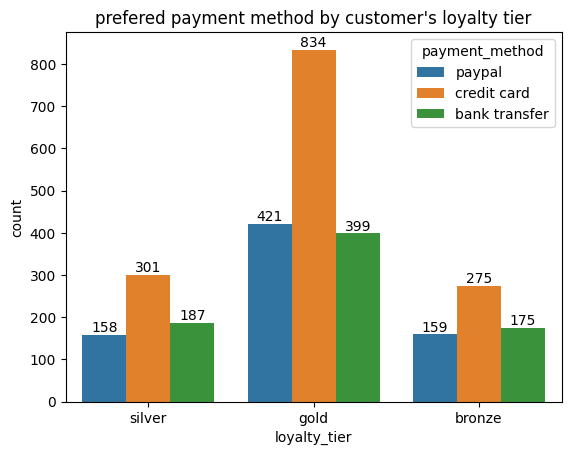

In [37]:
ax=sns.countplot(x="loyalty_tier",hue="payment_method",data=merged_df)
for container in ax.containers:
  ax.bar_label(container)
plt.title("prefered payment method by customer's loyalty tier")
plt.show()

 Credit Card is the prefered payment method among customers

# Visula Exploration
We are going to create some charts and graphs to help us understund well the trends and discover more hiden insights this include:
*  Line plot - weekly revenue trends by region
*  Bar chart - top 5 categories by revenue
*  Boxplot - quantity vs discount across categories
*  Heatmap - correlation between revenue, discount, and quantity
*  Countplot - orders by loyalty tier (with hue = region)
*  Stacked bar or pie - delivery status by price band


/tmp/ipython-input-38-2411337645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="region_sales",y="sum",data=revenue_peregion,palette=['red', 'green', 'blue', 'orange'])
/tmp/ipython-input-38-2411337645.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x="region_sales",y="sum",data=revenue_peregion,palette=['red', 'green', 'blue', 'orange'])


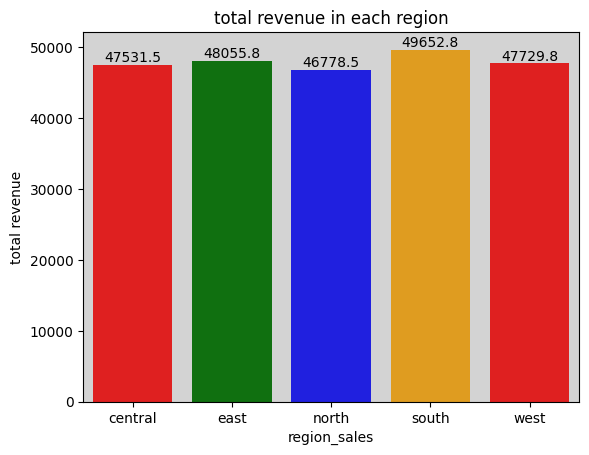

In [38]:
colors=['red', 'green', 'blue', 'orange']
ax=sns.barplot(x="region_sales",y="sum",data=revenue_peregion,palette=['red', 'green', 'blue', 'orange'])
for container in ax.containers:
  ax.bar_label(container)

plt.title("total revenue in each region")
plt.ylabel("total revenue")
ax.set_facecolor('lightgrey')
plt.show()

The South region generate the most revenue across all regions where North region is the region with the least revenue generated

/tmp/ipython-input-39-782456277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="price_band",y="quantity",data=band_price_performance,palette=colors)
/tmp/ipython-input-39-782456277.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax=sns.barplot(x="price_band",y="quantity",data=band_price_performance,palette=colors)


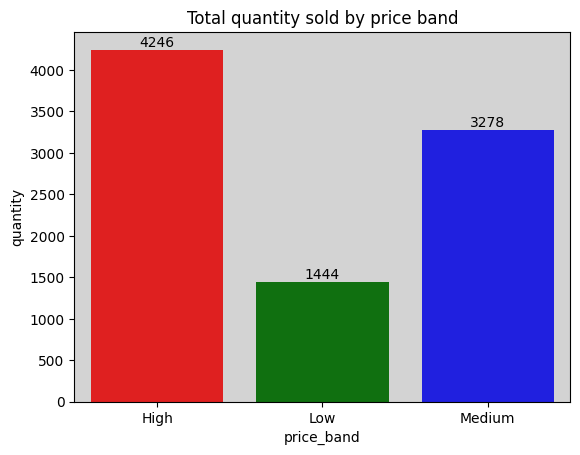

In [39]:
# summuryzing quantity sold by price band
band_price_performance=merged_df.pivot_table(index="price_band",values="quantity",aggfunc="sum")
ax=sns.barplot(x="price_band",y="quantity",data=band_price_performance,palette=colors)
for container in ax.containers:
  ax.bar_label(container)
ax.set_facecolor('lightgrey')
plt.title('Total quantity sold by price band')

plt.show()

High priced products had the highest quantity sold with a total of 4246 units

/tmp/ipython-input-40-2697094773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="category",y="revenue",data=piv_table,palette=colors)
/tmp/ipython-input-40-2697094773.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x="category",y="revenue",data=piv_table,palette=colors)


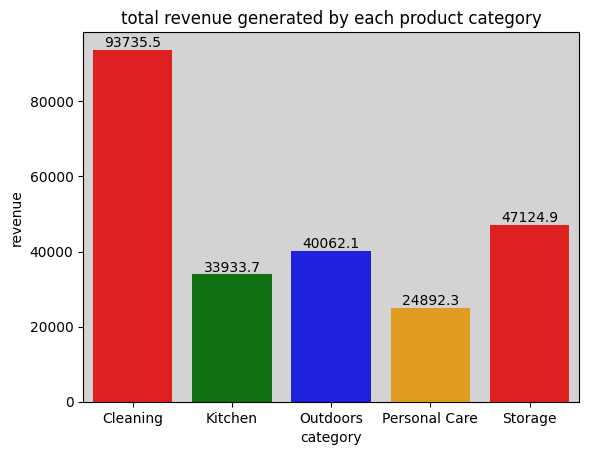

In [40]:
# create a bar plot for top 5 product category by revenue
ax=sns.barplot(x="category",y="revenue",data=piv_table,palette=colors)
for container in ax.containers:
  ax.bar_label(container)
ax.set_facecolor('lightgrey')
plt.title("total revenue generated by each product category")
plt.show()

With over 93537.5 cleaning products is the category with the most revenue generated, where personal care category is the least revenue generated with just 24892.3

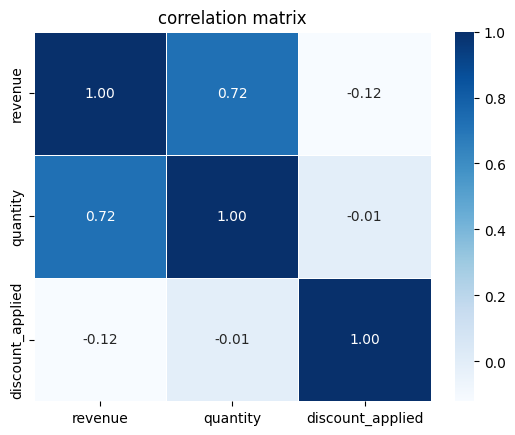

In [41]:
# create a heatmap to visualize the correlation between columns's variables
columns=["revenue","quantity","discount_applied"]
corr=merged_df[columns].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("correlation matrix")
plt.show()

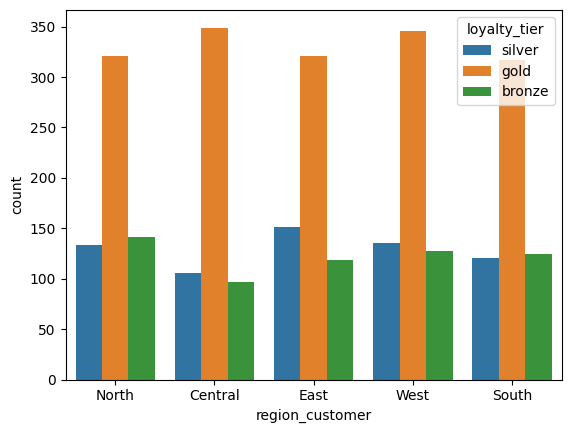

In [42]:
sns.countplot(x="region_customer",data=merged_df,hue="loyalty_tier")
plt.show()

/tmp/ipython-input-43-2758117459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region_sales",y="revenue",data=merged_df,palette='pastel')


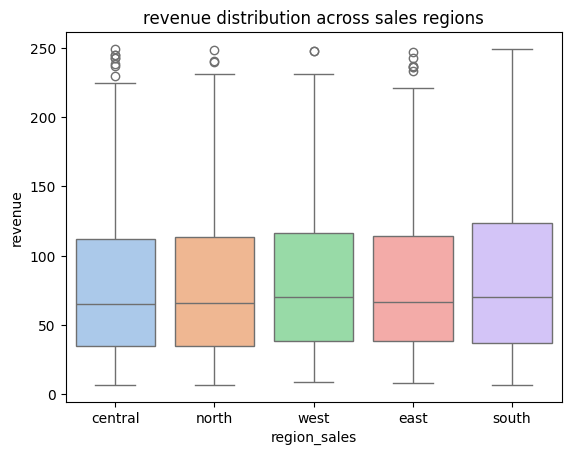

In [43]:
sns.boxplot(x="region_sales",y="revenue",data=merged_df,palette='pastel')
plt.title("revenue distribution across sales regions")
plt.show()

# Business Questions and insights:
Answering to Business question to deliver insights and recommendations:
*  Which product categories drive the most revenue, and in which regions?
*  Do discounts lead to more items sold?
*  Which loyalty tier generates the most value?
*  Are certain regions struggling with delivery delays?
*  Do customer signup patterns influence purchasing activity?


In [44]:
# table that summurize the category performace by region
product_performance=merged_df.groupby(["category","region_sales"])["revenue"].sum().reset_index()
product_performance.sort_values(by="revenue",ascending=False).head(1)


,category,region_sales,revenue
1,Cleaning,east,20018.019


In [45]:
print("Cleaning is the product category that derive the most revenue among other categories")
print("the East is the region with the most revenue generated across all region")

Cleaning is the product category that derive the most revenue among other categories
the East is the region with the most revenue generated across all region


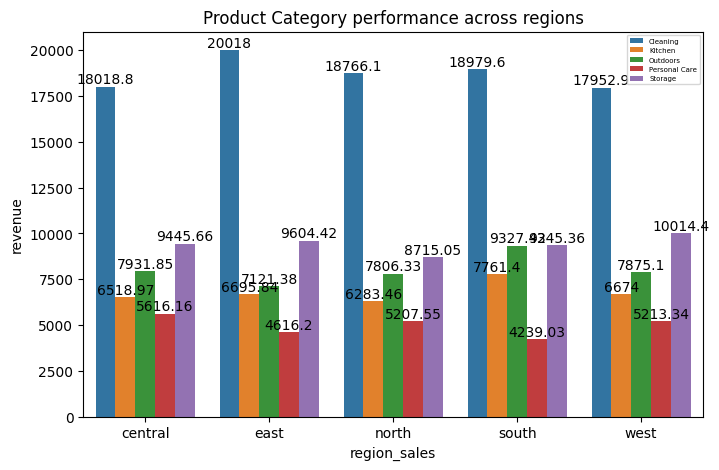

In [46]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="region_sales",y="revenue",hue="category",data=product_performance)
for container in ax.containers:
  ax.bar_label(container)
plt.legend(fontsize=5)
plt.title("Product Category performance across regions")
plt.show()

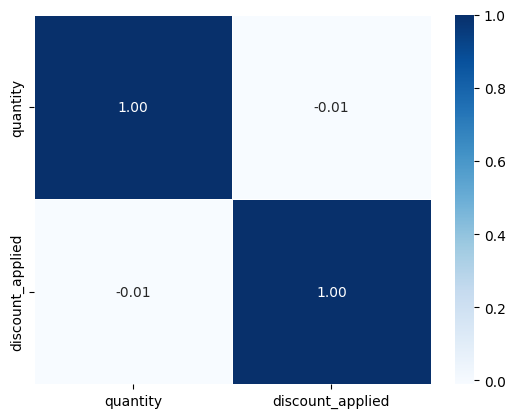

In [47]:
# visualize the correlation between quantity and discount_applied
qcorr=merged_df[["quantity","discount_applied"]].corr()
sns.heatmap(qcorr,annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

The correlation between discount applied and quantity sold is -0.01, indicating virtually no linear relationship between the two variables.This suggests that changes in discount levels do not significantly affect the quantity purshased

/tmp/ipython-input-48-260998660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="loyalty_tier",y="revenue",data=loyalty_performance,palette=colors)
/tmp/ipython-input-48-260998660.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax=sns.barplot(x="loyalty_tier",y="revenue",data=loyalty_performance,palette=colors)


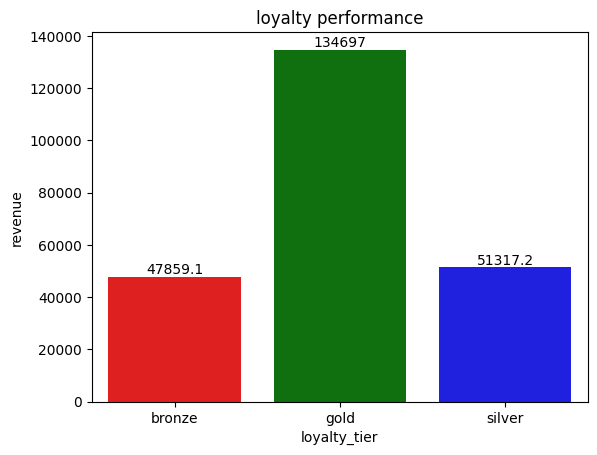

In [48]:
# summurize revenue by loyalty tier
loyalty_performance=merged_df.pivot_table(index="loyalty_tier",values="revenue",aggfunc="sum")
ax=sns.barplot(x="loyalty_tier",y="revenue",data=loyalty_performance,palette=colors)
for container in ax.containers:
  ax.bar_label(container)
plt.title("loyalty performance")
plt.show()

With over 134697 of total revenue ,"Gold" members generate the highest revenue overall

In [59]:
# Are certain regions struggling with delivery delays?
# summurize is late effect across regions
regions_delay=merged_df.groupby("region_sales")["is_late"].mean().sort_values(ascending=False)
regions_delay.reset_index()

,region_sales,is_late
0,east,0.418333
1,north,0.390728
2,central,0.390365
3,south,0.387205
4,west,0.369048


The "East" region is the area where delay level is high

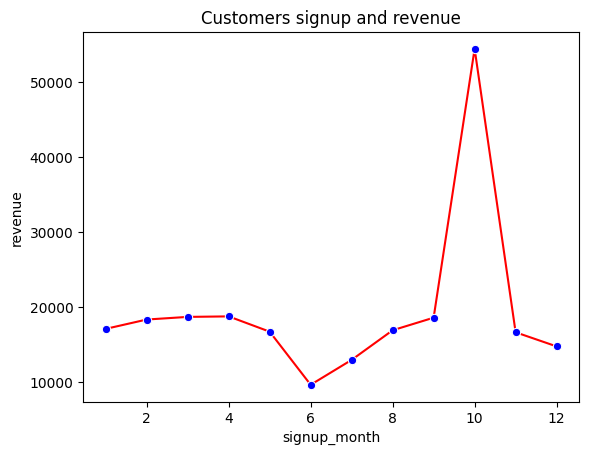

In [50]:
# Q7 Do customer signup patterns influence purchasing activity?
# line plot for customer's signup month purchase trends
grouped=merged_df.groupby("signup_month")["revenue"].sum().reset_index()
sns.lineplot(x="signup_month",y="revenue",data=grouped,marker="o",color="red",markerfacecolor="blue")
plt.title("Customers signup and revenue")
plt.show()

*  the line plot reveals  trends and seasonality in customer signup months and total revenue
*  Customers who signed up in the beginning of each season tend to spend more
*  Customers who signed up between Q3 & Q4 generate the highest revenue

In [51]:
merged_df.head()

,index,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_sales,...,gender,region_customer,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month
0,0,O966977,C00397,P0022,3,39.25,2025-06-07,delivered,paypal,central,...,female,North,silver,117.750,23,High,423 days,mills-logan.com,False,8.0
1,1,O696648,C00236,P0023,5,18.92,2025-06-07,delayed,credit card,north,...,other,North,gold,94.600,23,Medium,140 days,morgan.com,True,6.0
2,2,O202644,C00492,P0011,1,29.68,2025-06-07,delivered,bank transfer,north,...,male,Central,gold,25.228,23,Medium,74 days,walters-smith.com,False,9.0
3,3,O501803,C00031,P0003,1,32.76,2025-06-07,cancelled,credit card,central,...,female,Central,gold,26.208,23,High,327 days,gmail.com,False,7.0
4,4,O322242,C00495,P0016,1,47.62,2025-06-07,delayed,credit card,west,...,male,Central,gold,38.096,23,High,107 days,hotmail.com,True,9.0


# Optional Stretch Tasks

we are intresed on customers who:
*  signed up in Q2
*  Placed an order within 14 days
*  Received a discount > 20%
  
Then we will perform further analysis to:   
*  Flag underperforming products (low quantity, high discount, delayed deliveries)




In [52]:
# creat Q2_customers
merged_df["days"]=merged_df["order_date"]-merged_df["signup_date"]
merged_df["Quarter"]=merged_df["signup_date"].dt.quarter
Q2_customers=merged_df.query('Quarter==2')["customer_id"].unique()
Q2_customers

array(['C00236', 'C00076', 'C00211', 'C00334', 'C00197', 'C00331',
       'C00392', 'C00301', 'C00416', 'C00465', 'C00356', 'C00045',
       'C00056', 'C00371', 'C00221', 'C00476', 'C00044', 'C00421',
       'C00010', 'C00079', 'C00353', 'C00228', 'C00323', 'C00473',
       'C00253', 'C00140', 'C00234', 'C00119', 'C00286', 'C00250',
       'C00360', 'C00429', 'C00094', 'C00351', 'C00455', 'C00162',
       'C00343', 'C00027', 'C00373', 'C00023', 'C00099', 'C00167',
       'C00122', 'C00173', 'C00337', 'C00071', 'C00205', 'C00279',
       'C00483', 'C00295', 'C00380', 'C00199', 'C00268', 'C00387',
       'C00491', 'C00118', 'C00213', 'C00243', 'C00034', 'C00277',
       'C00363', 'C00292', 'C00096', 'C00150', 'C00097', 'C00080',
       'C00001', 'C00121', 'C00370', 'C00385', 'C00061', 'C00128',
       'C00178', 'C00379', 'C00196', 'C00405', 'C00305', 'C00112',
       'C00467', 'C00141', 'C00315', 'C00293', 'C00400', 'C00032',
       'C00302', 'C00316', 'C00125', 'C00186', 'C00003', 'C002

In [53]:
# extract customers who placed an order within 14 days of signig up
two_weekscustomers=merged_df[merged_df["days"]<='14 days']["customer_id"].unique()
two_weekscustomers

array(['C00356', 'C00056', 'C00371', 'C00221', 'C00476', 'C00234',
       'C00094', 'C00455', 'C00167', 'C00295', 'C00150', 'C00097',
       'C00080', 'C00112'], dtype=object)

In [54]:
high_discount_cust=merged_df.query('discount_applied>0.2')["customer_id"].unique()
high_discount_cust

array([], dtype=object)

In [55]:
# scaling revenue
merged_df["scaled_revenue"]=(
    (merged_df["revenue"] - merged_df["revenue"].min()) /
    (merged_df["revenue"].max() - merged_df["revenue"].min())
)
merged_df["scaled_revenue"].head()

,scaled_revenue
0,0.457431
1,0.361987
2,0.075976
3,0.080016
4,0.129029


In [56]:
# create a product summury to evaluate product performance by quantity,discount_applied and delayed rate
product_summary = merged_df.groupby('product_name').agg({
    'quantity': 'sum',
    'discount_applied': 'mean',
    'is_late': 'mean'
}).reset_index()
product_summary.sort_values(by="quantity",ascending=False)

,product_name,quantity,discount_applied,is_late
5,Cleaning Product 70,374,0.088017,0.371901
20,Outdoors Product 91,355,0.091364,0.381818
24,Storage Product 10,351,0.067593,0.351852
13,Kitchen Product 53,344,0.082479,0.367521
10,Cleaning Product 86,336,0.081132,0.471698
8,Cleaning Product 84,325,0.077315,0.416667
0,Cleaning Product 16,317,0.097115,0.451923
19,Outdoors Product 55,317,0.083913,0.321739
22,Personal Care Product 11,316,0.078774,0.396226
15,Kitchen Product 82,314,0.068878,0.418367


In [57]:
# define threshold
quantity_sold=product_summary["quantity"].quantile(.25)
discount=product_summary["discount_applied"].quantile(.75)
delievery=product_summary["is_late"]>=0.3

flaged_products=product_summary[(product_summary["quantity"]<=quantity_sold) & (product_summary["discount_applied"]>=discount)]
flaged_products["product_name"]


,product_name
21,Personal Care Product 1
